In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset (assuming the file name is 'Restaurant_Reviews.tsv')
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')

# Separate features (Review) and target (Liked)
X = data['Review']
y = data['Liked']

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')

# Transform the 'Review' column into TF-IDF features
X_tfidf = tfidf.fit_transform(X)

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display results
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")


In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('/content/Restaurant_Reviews 1.tsv', sep='\t')


In [ ]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove short words
    tokens = [word for word in tokens if len(word) > 2]
    return ' '.join(tokens)

In [ ]:
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

In [ ]:
X = data['Cleaned_Review']
y = data['Liked']

In [ ]:
tfidf = TfidfVectorizer()

In [ ]:
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")

TF-IDF Matrix Shape: (1000, 1792)
Training Set Shape: (800, 1792)
Test Set Shape: (200, 1792)


In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 73.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        96
           1       0.84      0.60      0.70       104

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.76      0.73      0.73       200

Confusion Matrix:
[[84 12]
 [42 62]]


Logistic Regression Accuracy: 76.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.78        96
           1       0.84      0.68      0.75       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.78      0.77      0.76       200

Confusion Matrix:
[[82 14]
 [33 71]]


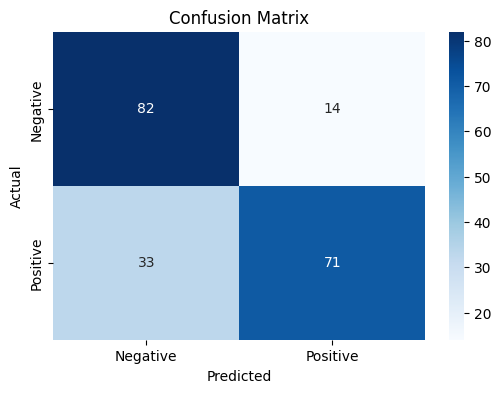

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%\n")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
